In [13]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

In [12]:
import matplotlib.font_manager as fm

# 한국어 출력을 위한 폰트 설정
plt.rc('font', family='NanumGothic') 

# 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# 데이터 로드
gdf = gpd.read_file("data/sig.shp", encoding='euc-kr')

In [8]:
gdf

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
247,52740,Jangsu-gun,장수군,"POLYGON ((1010833.697 1760276.768, 1010833.998..."
248,52750,Imsil-gun,임실군,"POLYGON ((964208.319 1735959.093, 964238.552 1..."
249,52770,Sunchang-gun,순창군,"POLYGON ((952623.909 1728974.778, 952672.751 1..."
250,52790,Gochang-gun,고창군,"MULTIPOLYGON (((902676.539 1717491.597, 902679..."


In [20]:
# 'SIG_CD'를 사용하여 경기도(41로 시작하는 코드)에 해당하는 데이터만 추출
gdf_gyeonggi = gdf[gdf['SIG_CD'].str.startswith('41')]
gdf_gyeonggi.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
76,41111,"Jangan-gu, Suwon-si",수원시 장안구,"POLYGON ((957466.968 1928109.204, 957495.822 1..."
77,41113,"Gwonseon-gu, Suwon-si",수원시 권선구,"POLYGON ((958952.060 1915432.098, 958913.531 1..."
78,41115,"Paldal-gu, Suwon-si",수원시 팔달구,"POLYGON ((958858.331 1921730.191, 958913.122 1..."
79,41117,"Yeongtong-gu, Suwon-si",수원시 영통구,"POLYGON ((962303.378 1918638.005, 962306.340 1..."
80,41131,"Sujeong-gu, Seongnam-si",성남시 수정구,"POLYGON ((968165.515 1941710.496, 968177.333 1..."


<Axes: >

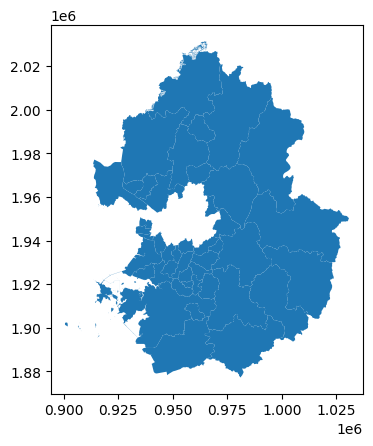

In [10]:
gdf_gyeonggi.plot()

In [16]:
# 경기도 영역 결정하기
# 모든 시군구를 포함하는 최소 바운딩 박스
bounds = gdf_gyeonggi.total_bounds
xmin, ymin, xmax, ymax = bounds

# 격자 크기 설정 = 500m
grid_size = 500

# 격자의 x, y 좌표 생성
x_coords = np.arange(xmin, xmax + grid_size, grid_size)
y_coords = np.arange(ymin, ymax + grid_size, grid_size)

# 격자 생성
grid = []
for x in x_coords:
    for y in y_coords:
        grid.append(box(x, y, x+grid_size, y+grid_size))

# GeoDataFrame으로 격자 데이터를 변환하고 고유 ID 부여
grid_gdf = gpd.GeoDataFrame(grid, columns=['geometry'])
grid_gdf['grid_id'] = range(1, len(grid_gdf) + 1)

# 결과
print(grid_gdf.head())

                                            geometry  grid_id
0  POLYGON ((900994.668 1877294.547, 900994.668 1...        1
1  POLYGON ((900994.668 1877794.547, 900994.668 1...        2
2  POLYGON ((900994.668 1878294.547, 900994.668 1...        3
3  POLYGON ((900994.668 1878794.547, 900994.668 1...        4
4  POLYGON ((900994.668 1879294.547, 900994.668 1...        5


In [21]:
grid_gdf

,geometry,grid_id
0,"POLYGON ((900994.668 1877294.547, 900994.668 1...",1
1,"POLYGON ((900994.668 1877794.547, 900994.668 1...",2
2,"POLYGON ((900994.668 1878294.547, 900994.668 1...",3
3,"POLYGON ((900994.668 1878794.547, 900994.668 1...",4
4,"POLYGON ((900994.668 1879294.547, 900994.668 1...",5
...,...,...
81215,"POLYGON ((1031494.668 2029794.547, 1031494.668...",81216
81216,"POLYGON ((1031494.668 2030294.547, 1031494.668...",81217
81217,"POLYGON ((1031494.668 2030794.547, 1031494.668...",81218
81218,"POLYGON ((1031494.668 2031294.547, 1031494.668...",81219


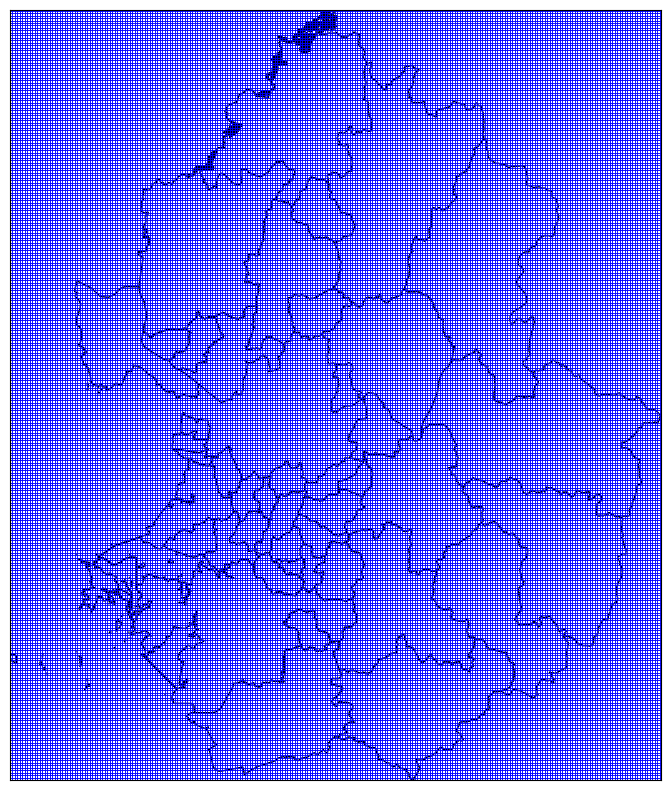

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

# 시군구 데이터
gdf_gyeonggi.plot(ax=ax, color='white', edgecolor='black')

# 위에 격자 데이터 겹치기
grid_gdf.plot(ax=ax, facecolor="none", edgecolor='blue', linewidth=0.5)

# 지도의 범위를 경기도 영역에 맞추기
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# 축 레이블을 제거합니다.
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

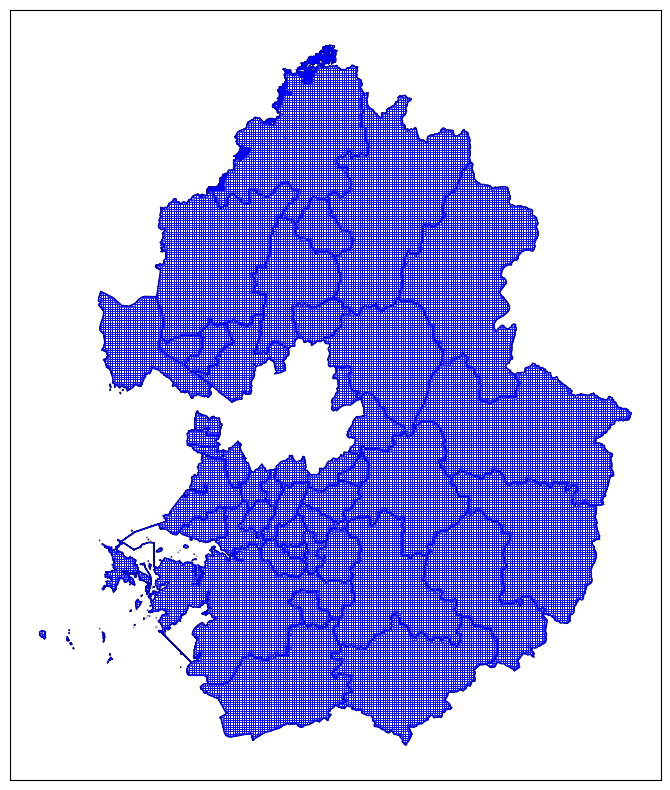

In [25]:
# grid_gif의 CRS를 gdf_gyeonggi와 동일하게 설정
grid_gdf = grid_gdf.set_crs(gdf_gyeonggi.crs, allow_override=True)

# 경기도 영역 내의 그리드만 필터링 하기 위해 overlay 함수 사용
gdf_in_gyeonggi = gpd.overlay(grid_gdf, gdf_gyeonggi, how='intersection')

# 결과 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf_gyeonggi.plot(ax=ax, color='white', edgecolor='black')
gdf_in_gyeonggi.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=0.5)

# 축 레이블 제거
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [28]:
# grid_id를 1부터 시작하는 연속적인 숫자로 재할당
gdf_in_gyeonggi['grid_id'] = range(1, len(gdf_in_gyeonggi) + 1)

# 결과 확인
print(gdf_in_gyeonggi.head())

   grid_id SIG_CD           SIG_ENG_NM SIG_KOR_NM  \
0        1  41273  Danwon-gu, Ansan-si    안산시 단원구   
1        2  41273  Danwon-gu, Ansan-si    안산시 단원구   
2        3  41273  Danwon-gu, Ansan-si    안산시 단원구   
3        4  41273  Danwon-gu, Ansan-si    안산시 단원구   
4        5  41273  Danwon-gu, Ansan-si    안산시 단원구   

                                            geometry  
0  POLYGON ((900994.668 1901294.547, 900994.668 1...  
1  POLYGON ((900994.668 1901794.547, 900994.668 1...  
2  POLYGON ((900994.668 1902294.547, 900994.668 1...  
3  POLYGON ((900994.668 1902294.547, 900684.690 1...  
4  POLYGON ((901494.668 1900794.547, 901494.668 1...  


In [30]:
gdf_in_gyeonggi.to_file("data/gyeonggi_grid_id.shp", encoding='euc-kr')